In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata


In [2]:
df = pd.read_csv('../logs/compiled.out')

In [3]:
df

,TrainFirstMulThenAdd,TrainGaussStdMul,TrainGaussStdAdd,InfFirstMulThenAdd,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,True,1.000000e+13,0.599484,False,1.000000e-04,1.000000e-04,66.69
1,True,1.000000e+13,0.599484,False,7.742637e-03,1.000000e-04,66.63
2,True,1.000000e+13,0.599484,False,5.994843e-01,1.000000e-04,66.41
3,True,1.000000e+13,0.599484,False,4.641589e+01,1.000000e-04,66.40
4,True,1.000000e+13,0.599484,False,3.593814e+03,1.000000e-04,66.89
...,...,...,...,...,...,...,...
9995,True,1.668101e+09,0.599484,False,2.782559e+05,1.000000e+13,67.64
9996,True,1.668101e+09,0.599484,False,2.154435e+07,1.000000e+13,68.02
9997,True,1.668101e+09,0.599484,False,1.668101e+09,1.000000e+13,68.28
9998,True,1.668101e+09,0.599484,False,1.291550e+11,1.000000e+13,67.64


In [4]:
# drop 'TrainFirstMulThenAdd' and 'InfFirstMulThenAdd' columns
columns_to_drop = ['TrainFirstMulThenAdd', 'InfFirstMulThenAdd']
df = df.drop(columns=columns_to_drop)

In [5]:
df

,TrainGaussStdMul,TrainGaussStdAdd,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,1.000000e+13,0.599484,1.000000e-04,1.000000e-04,66.69
1,1.000000e+13,0.599484,7.742637e-03,1.000000e-04,66.63
2,1.000000e+13,0.599484,5.994843e-01,1.000000e-04,66.41
3,1.000000e+13,0.599484,4.641589e+01,1.000000e-04,66.40
4,1.000000e+13,0.599484,3.593814e+03,1.000000e-04,66.89
...,...,...,...,...,...
9995,1.668101e+09,0.599484,2.782559e+05,1.000000e+13,67.64
9996,1.668101e+09,0.599484,2.154435e+07,1.000000e+13,68.02
9997,1.668101e+09,0.599484,1.668101e+09,1.000000e+13,68.28
9998,1.668101e+09,0.599484,1.291550e+11,1.000000e+13,67.64


In [6]:
# generate the inference plot

# Configure specific plot
# columns_to_drop = ['TrainGaussStdMul', 'TrainGaussStdAdd']  # Columns to group by
# group_by_columns = ['InfGaussStdMul', 'InfGaussStdAdd']  # Columns to drop
group_by_columns = ['TrainGaussStdMul', 'TrainGaussStdAdd']  # Columns to group by
columns_to_drop = ['InfGaussStdMul', 'InfGaussStdAdd']  # Columns to drop
aggregation_function = 'mean'  # Aggregation function: 'mean', 'min', 'max', 'std'

# group by columns and aggregate
df_inference = df.groupby(group_by_columns)['Accuracy'].mean().reset_index()
df_inference

,TrainGaussStdMul,TrainGaussStdAdd,Accuracy
0,1.000000e-04,1.000000e-04,76.1378
1,1.000000e-04,7.742637e-03,76.4309
2,1.000000e-04,5.994843e-01,76.0974
3,1.000000e-04,4.641589e+01,73.8249
4,1.000000e-04,3.593814e+03,64.1547
...,...,...,...
95,1.000000e+13,2.782559e+05,67.0160
96,1.000000e+13,2.154435e+07,66.1065
97,1.000000e+13,1.668101e+09,65.3619
98,1.000000e+13,1.291550e+11,67.0171


/var/folders/sz/y9cc8wkx58b3gbgkmhx_n1h40000gn/T/ipykernel_60874/1911112228.py:17: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(df_inference['TrainGaussStdMul'], df_inference['TrainGaussStdAdd'], c=df_inference['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+')


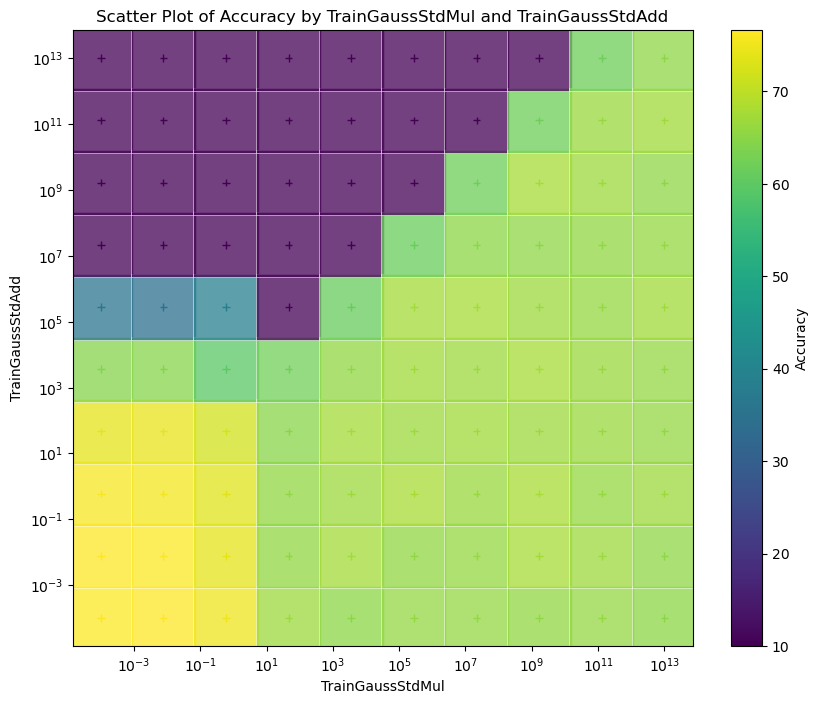

In [43]:
import matplotlib.path as mpath

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting using scatter with point sizes based on 'Accuracy'
# Normalize the sizes by scaling the Accuracy values to a suitable range.
# sizes = (df_inference['Accuracy'] - df_inference['Accuracy'].min()) / (df_inference['Accuracy'].max() - df_inference['Accuracy'].min()) * 195 + 5  # Scale between 5 and 200

rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
rectangle_path = mpath.Path(rect_coords, rect_codes)
sizes = 2200
scatter = ax.scatter(df_inference['TrainGaussStdMul'], df_inference['TrainGaussStdAdd'], c=df_inference['Accuracy'], s=sizes, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path)


scatter = ax.scatter(df_inference['TrainGaussStdMul'], df_inference['TrainGaussStdAdd'], c=df_inference['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+')

# Set logarithmic scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and titles
ax.set_xlabel('TrainGaussStdMul')
ax.set_ylabel('TrainGaussStdAdd')
ax.set_title('Scatter Plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd')

# Add colorbar to the plot
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Accuracy')

# Display the plot
plt.show()